In [106]:
# load train_network.gexf
import networkx as nx
G = nx.read_gexf("train_network.gexf")

# print the number of nodes and edges
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())


Number of nodes:  222
Number of edges:  664


In [107]:
# convert the graph to an undirected simple graph
undirected_G = G.to_undirected()

In [5]:
undirected_G.number_of_nodes()
undirected_G.number_of_edges()

352

In [6]:
# generate degree distribution of undirected_G
import collections
degree_sequence = sorted([d for n, d in undirected_G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


In [13]:
# import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

def plot_degree_distribution(G):
    """
    Generates and plots the degree distribution of an undirected graph.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        dict: A dictionary where keys are degrees and values are their frequencies.
    """
    # Get the degree of each node
    degrees = [degree for _, degree in G.degree()]

    # Count the frequency of each degree
    degree_counts = Counter(degrees)

    # Separate degrees and their frequencies for plotting
    x, y = zip(*sorted(degree_counts.items()))

    
    total_nodes = G.number_of_nodes()

    # Normalize the frequency of each degree
    y = [count / total_nodes for count in y]
    

    # Plot the degree distribution
    plt.figure(figsize=(8, 6))
    plt.bar(x, y, width=0.8, color='b', alpha=0.7, edgecolor='k')
    plt.title('Degree Distribution', fontsize=14)
    plt.xlabel('Degree', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(range(0, max(x) + 1))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # plot log-log degree distribution
    plt.figure(figsize=(8, 6))
    plt.loglog(x, y, 'bo', alpha=0.7)
    plt.title('Log-Log Degree Distribution', fontsize=14)
    plt.xlabel('Degree', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.grid(True, which="both", ls="--", alpha=0.7)
    plt.show()

    return dict(degree_counts)


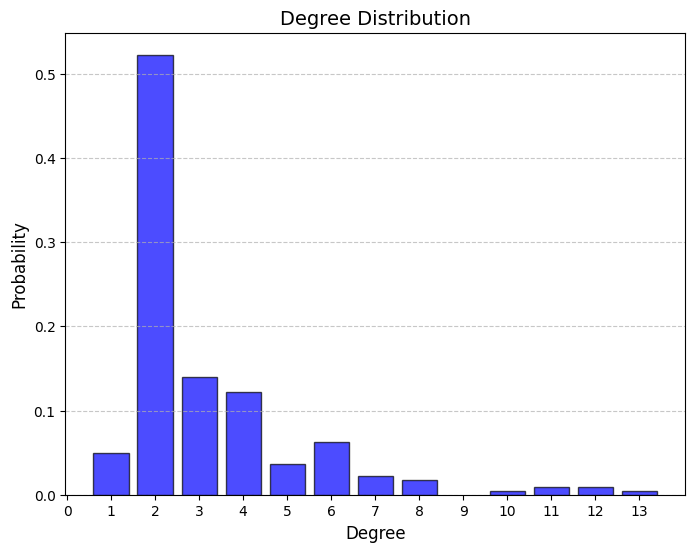

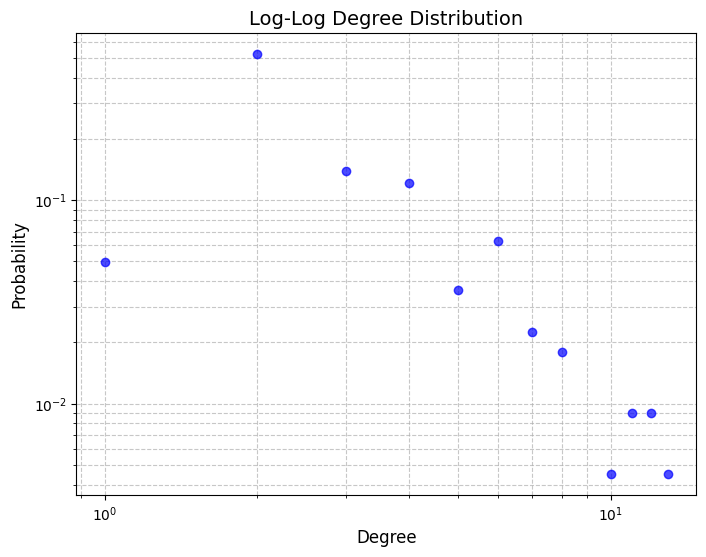

{12: 2,
 10: 1,
 6: 14,
 13: 1,
 7: 5,
 2: 116,
 4: 27,
 3: 31,
 5: 8,
 8: 4,
 1: 11,
 11: 2}

In [14]:
plot_degree_distribution(undirected_G)

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def plot_giant_component_vs_node_removal(G, removal_strategy="random", title = "Random Failures"):
    """
    Plots the size of the giant component vs the fraction of nodes removed.

    Parameters:
        G (networkx.Graph): The input graph.
        removal_strategy (str): The strategy for node removal ('random' or 'degree').
    """
    # Make a copy of the graph
    G = G.copy()
    num_nodes = G.number_of_nodes()

    # List to store the fraction of nodes removed and size of the giant component
    fractions_removed = []
    giant_component_sizes = []

    # Generate a list of nodes to remove
    if removal_strategy == "degree":
        # Remove nodes by descending degree
        nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)
        nodes = [node for node, _ in nodes]
    elif removal_strategy == "random":
        # Remove nodes in random order
        nodes = list(G.nodes)
        random.shuffle(nodes)
    else:
        raise ValueError("Invalid removal strategy. Choose 'random' or 'degree'.")

    # Remove nodes one by one and compute the size of the giant component
    for i, node in enumerate(nodes):
        G.remove_node(node)
        largest_cc = max(nx.connected_components(G), key=len, default=[])
        fractions_removed.append((i + 1) / num_nodes)  # Fraction of nodes removed
        giant_component_sizes.append(len(largest_cc) / num_nodes )  # Size of the giant component

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(fractions_removed, giant_component_sizes, label=f"Strategy: {removal_strategy}")
    plt.title(title, fontsize=14)
    plt.xlabel("Fraction of Nodes Removed", fontsize=12)
    plt.ylabel("Size of Giant Component", fontsize=12)
    plt.grid(alpha=0.7)
    plt.legend(fontsize=10)
    plt.show()


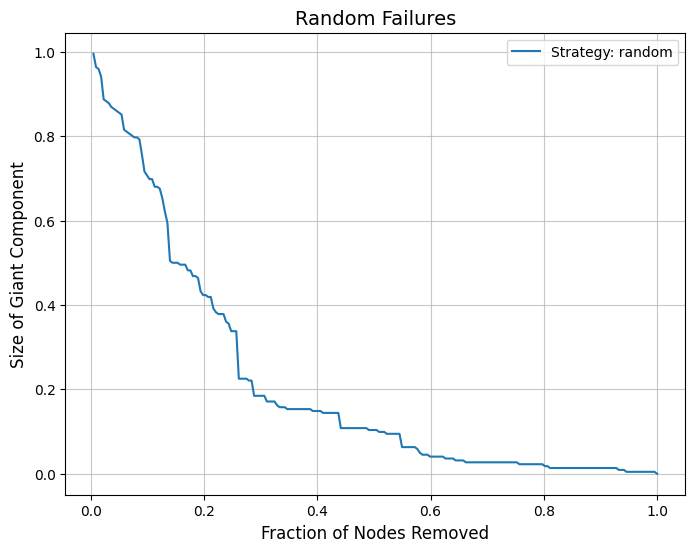

In [28]:
plot_giant_component_vs_node_removal(undirected_G, "random")

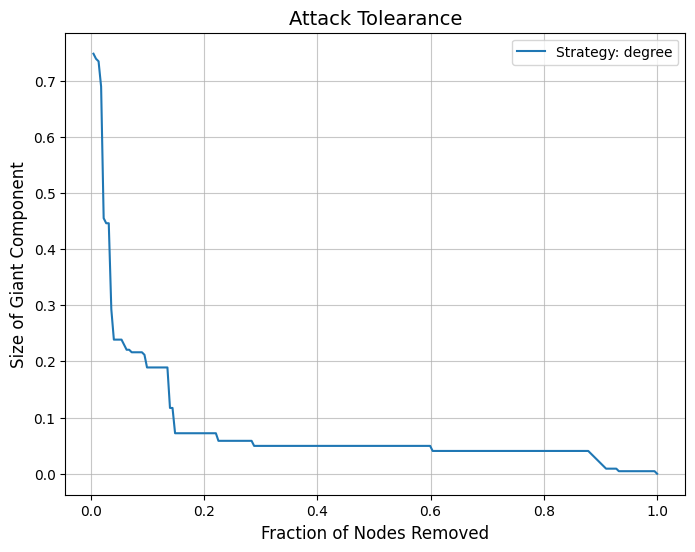

In [29]:
plot_giant_component_vs_node_removal(undirected_G, "degree", "Attack Tolearance")


In [41]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

def detect_communities(G):
    """
    Detects communities in an undirected graph using the Louvain algorithm.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        dict: A dictionary where keys are nodes and values are community IDs.
    """
    # Compute the best partition (community structure)
    partition = community_louvain.best_partition(G)
    
    return partition

def plot_large_communities(G, partition):
    """
    Plots large graphs with communities in a visually clear manner.

    Parameters:
        G (networkx.Graph): The input graph.
        partition (dict): A dictionary mapping nodes to community IDs.
    """
    # Assign colors to nodes based on their community
    node_colors = [partition[node] for node in G.nodes()]

    # Use a spring layout for better spacing
    pos = nx.spring_layout(G, seed=42)  # Adjust seed for consistent layout

    plt.figure(figsize=(12, 8))
    nx.draw(
        G,
        pos,
        node_color=node_colors,
        cmap=plt.cm.tab20,
        node_size=100,  # Adjust node size
        edge_color="gray",
        alpha=0.7,  # Transparency for edges
        with_labels=False  # Hide labels for clarity
    )
    plt.title("Communities in the Network (Simplified)", fontsize=16)
    plt.show()





Node-to-Community Mapping:
{'Dhaka': 0, 'Biman_Bandar': 0, 'BBSetu_E': 1, 'Chatmohar': 1, 'Natore': 1, 'Santahar': 4, 'Talora': 4, 'Bogura': 4, 'Sonatola': 4, 'Bonar_Para': 4, 'Gaibandha': 4, 'Bamondanga': 3, 'Pirgacha': 3, 'Kaunia': 3, 'Kurigram': 3, 'Rangpur': 3, 'Joypurhat': 4, 'Parbatipur': 6, 'Dinajpur': 6, 'Pirganj': 6, 'Thakurgaon_Road': 6, 'B Sirajul Islam': 6, 'Joydebpur': 0, 'Tangail': 0, 'SH M Monsur Ali': 1, 'Ullapara': 1, 'Ishwardi Bypass': 1, 'Akkelpur': 4, 'Panchbibi': 4, 'Birampur': 4, 'Fulbari': 4, 'Chirirbandar': 6, 'Setabganj': 6, 'Ruhia': 6, 'Kismat': 6, 'Khulna': 7, 'Noapara': 7, 'Jashore': 7, 'Mubarakganj': 7, 'Kotchandpur': 7, 'Darshana_Halt': 7, 'Chuadanga': 7, 'Alamdanga': 7, 'Poradaha': 7, 'Bheramara': 7, 'Pakshi': 7, 'Ishwardi': 1, 'Ahsanganj': 4, 'Saidpur': 6, 'Nilphamari': 6, 'Domar': 6, 'Chilahati': 6, 'Jamtail': 1, 'Boral_Bridge': 1, 'Abdulpur': 1, 'Arani': 1, 'Rajshahi': 1, 'Daulatpur': 7, 'Gobra': 10, 'Borashi': 10, 'Gopalganj': 10, 'Chandradighalia': 1

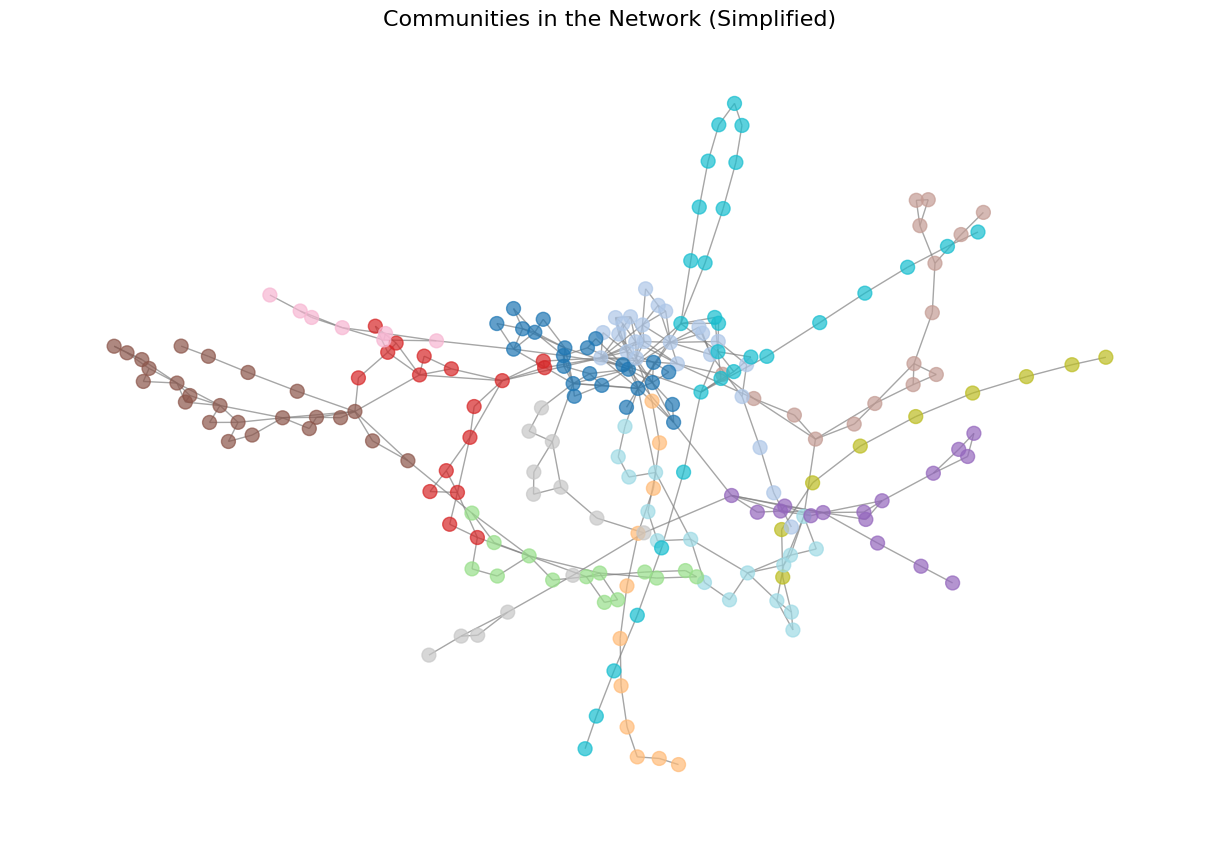

In [42]:
# Detect communities
communities = detect_communities(undirected_G)

# Print the communities (node-to-community mapping)
print("Node-to-Community Mapping:")
print(communities)

# Plot the graph with community coloring
plot_large_communities(undirected_G, communities)

In [36]:
undirected_G.number_of_nodes()

222

Minimal set of nodes to remove: {'Natore'}


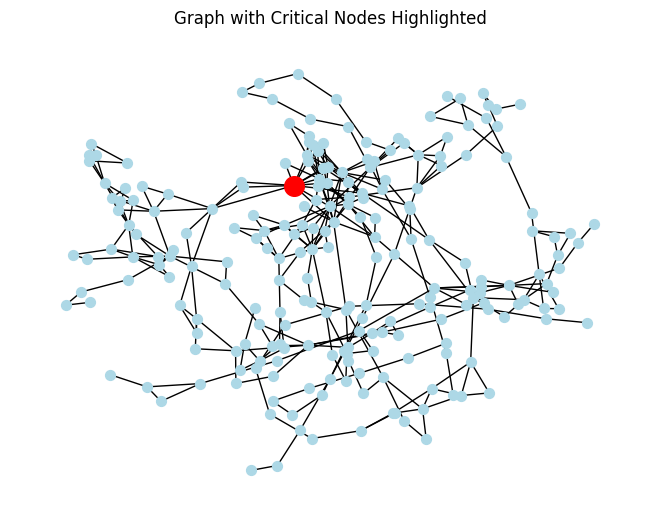

In [47]:
import networkx as nx

def find_minimal_cut_nodes(G):
    """
    Finds a minimal set of nodes whose removal disconnects the graph.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        cut_nodes (set): Minimal set of nodes to remove to divide the graph into two components.
    """
    # Use NetworkX's built-in function to find the minimum node cut
    cut_nodes = nx.minimum_node_cut(G)
    return cut_nodes

# Example Usage:
if __name__ == "__main__":
    # Create an example graph
    G = undirected_G
    
    # Ensure the graph is connected
    if not nx.is_connected(G):
        print("Graph is not connected. Cannot find a cut that splits it into two components.")
    else:
        # Find minimal cut nodes
        cut_nodes = find_minimal_cut_nodes(G)
        print(f"Minimal set of nodes to remove: {cut_nodes}")

        # Visualize the graph and the critical nodes
        pos = nx.spring_layout(G, k=0.15, seed=42)
        nx.draw(G, pos, with_labels=False, node_color="lightblue", node_size=50)
        nx.draw_networkx_nodes(G, pos, nodelist=cut_nodes, node_color="red", node_size=200)
        plt.title("Graph with Critical Nodes Highlighted")
        plt.show()


Minimal set of nodes to remove: {'Natore'}


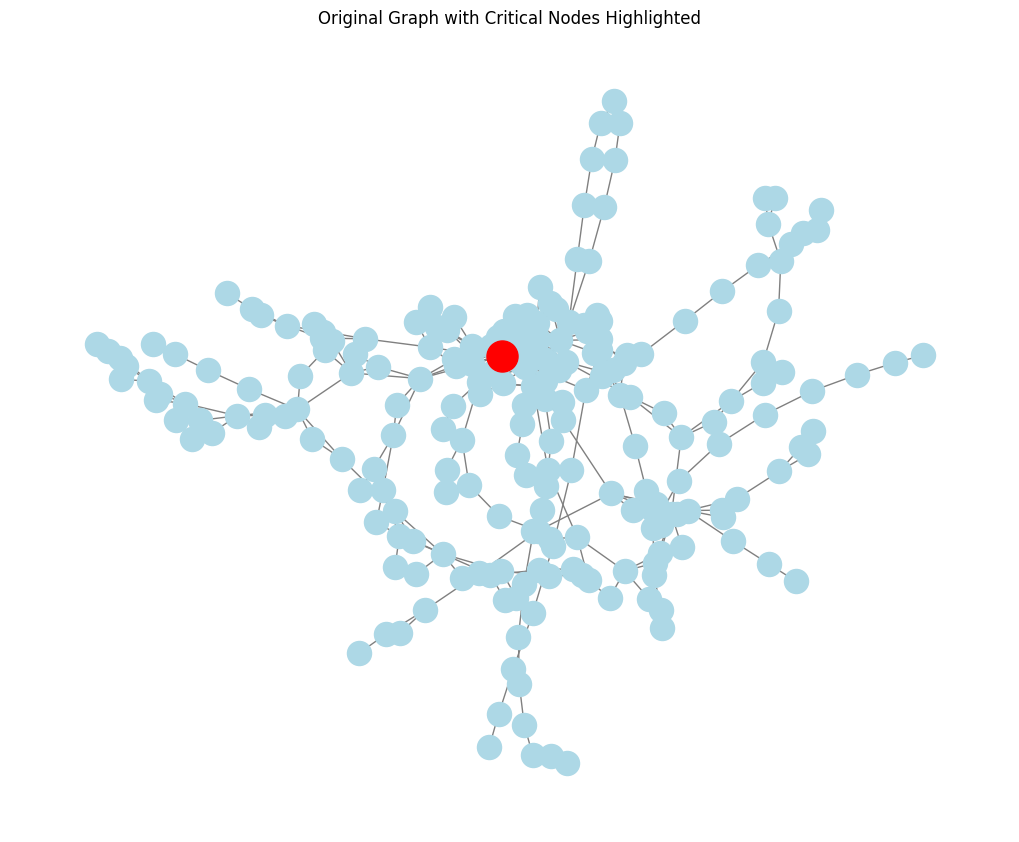

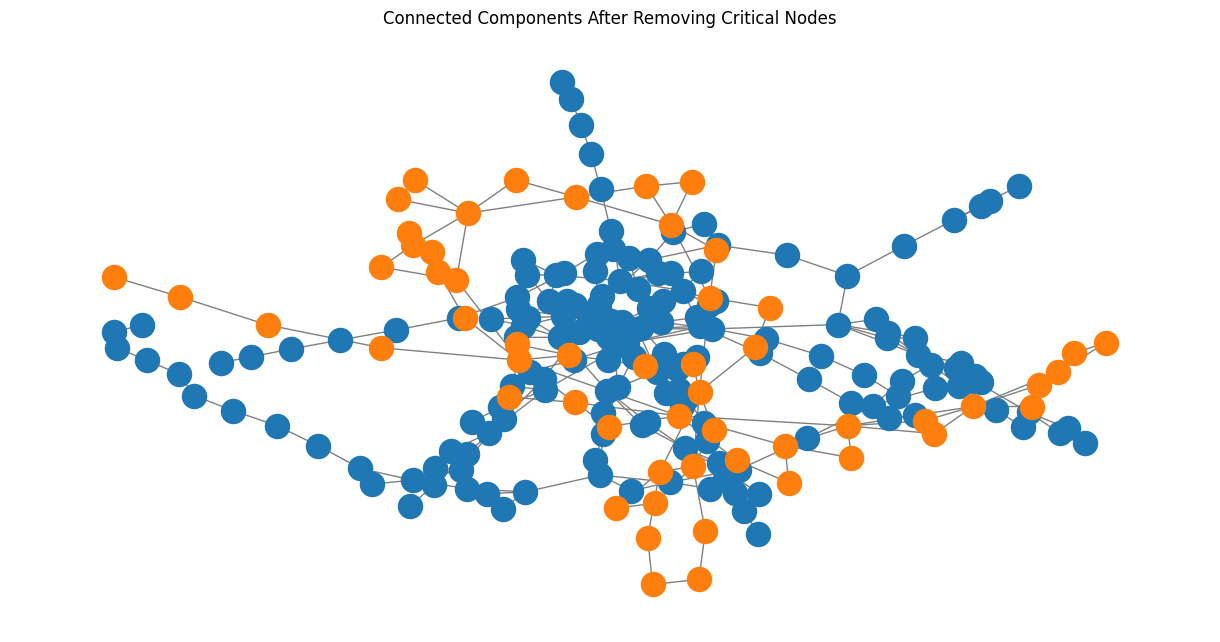

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

def find_minimal_cut_nodes(G):
    """
    Finds a minimal set of nodes whose removal disconnects the graph.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        cut_nodes (set): Minimal set of nodes to remove to divide the graph into two components.
    """
    # Use NetworkX's built-in function to find the minimum node cut
    cut_nodes = nx.minimum_node_cut(G)
    return cut_nodes

def plot_graph_components(G, components, title):
    """
    Plots each connected component of the graph.

    Parameters:
        G (networkx.Graph): The original graph.
        components (list): List of connected components (subgraphs).
        title (str): Title for the plot.
    """
    plt.figure(figsize=(12, 6))
    for i, component in enumerate(components):
        pos = nx.spring_layout(component, seed=42)  # Use spring layout for spread
        nx.draw(
            component,
            pos,
            with_labels=False,
            node_size=300,
            node_color=f"C{i}",  # Different color for each component
            edge_color="gray",

        )
    plt.title(title)
    plt.show()

# Main script
if __name__ == "__main__":
    # Create an example graph
    G = undirected_G

    # Ensure the graph is connected
    if not nx.is_connected(G):
        print("Graph is not connected. Cannot find a cut that splits it into two components.")
    else:
        # Find minimal cut nodes
        cut_nodes = find_minimal_cut_nodes(G)
        print(f"Minimal set of nodes to remove: {cut_nodes}")

        # Remove cut nodes and get the connected components
        G_after_cut = G.copy()
        G_after_cut.remove_nodes_from(cut_nodes)
        components = [G_after_cut.subgraph(c).copy() for c in nx.connected_components(G_after_cut)]

        # Plot the original graph with critical nodes
        pos = nx.spring_layout(G, seed=42)
        plt.figure(figsize=(10, 8))
        nx.draw(
            G,
            pos,
            with_labels=False,
            node_color="lightblue",
            node_size=300,
            edge_color="gray"
        )
        nx.draw_networkx_nodes(
            G,
            pos,
            nodelist=cut_nodes,
            node_color="red",
            node_size=500
        )
        plt.title("Original Graph with Critical Nodes Highlighted")
        plt.show()

        # Plot each connected component separately
        plot_graph_components(G_after_cut, components, "Connected Components After Removing Critical Nodes")


Minimal set of nodes to remove: {'Natore'}


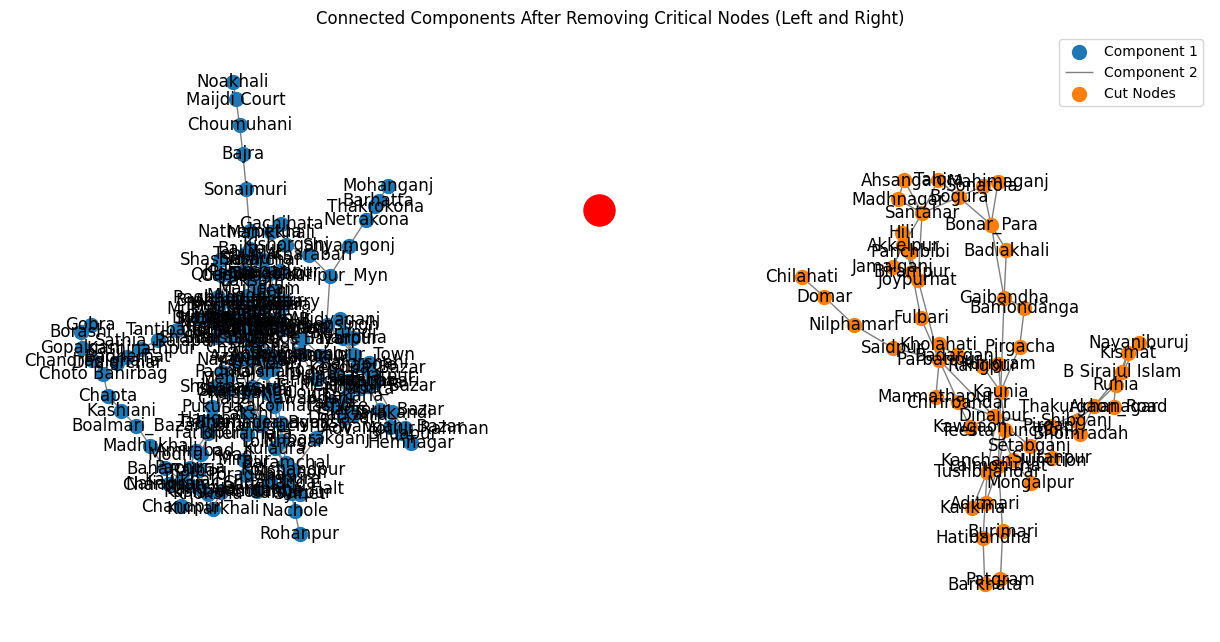

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

def find_minimal_cut_nodes(G):
    """
    Finds a minimal set of nodes whose removal disconnects the graph.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        cut_nodes (set): Minimal set of nodes to remove to divide the graph into two components.
    """
    return nx.minimum_node_cut(G)

def plot_components_separately(G, components, cut_nodes, original_positions):
    """
    Plots the connected components of the graph on separate sides (left and right).

    Parameters:
        G (networkx.Graph): The original graph.
        components (list): List of connected components (subgraphs).
        cut_nodes (set): The critical nodes that were removed.
        original_positions (dict): Spring layout positions for the original graph.
    """
    # Modify positions to separate components
    pos = {}
    offset = 2  # Offset to separate the components

    # Assign positions for each component (left and right)
    for i, component in enumerate(components):
        component_pos = nx.spring_layout(component, seed=42)
        for node, position in component_pos.items():
            if i == 0:  # Left component
                pos[node] = (position[0] - offset, position[1])
            elif i == 1:  # Right component
                pos[node] = (position[0] + offset, position[1])

    # Add positions for the cut nodes in the middle
    for node in cut_nodes:
        pos[node] = original_positions[node]

    # Plot the components
    plt.figure(figsize=(12, 6))
    for i, component in enumerate(components):
        nx.draw(
            component,
            pos,
            with_labels=True,
            node_size=100,
            node_color=f"C{i}",  # Different color for each component
            edge_color="gray"
        )

    # Highlight the cut nodes in red
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=cut_nodes,
        node_color="red",
        node_size=500,
        label="Cut Nodes"
    )
    plt.title("Connected Components After Removing Critical Nodes (Left and Right)")
    plt.legend(["Component 1", "Component 2", "Cut Nodes"])
    plt.show()

# Main script
if __name__ == "__main__":
    # Create an example graph
    G = undirected_G

    # Ensure the graph is connected
    if not nx.is_connected(G):
        print("Graph is not connected. Cannot find a cut that splits it into two components.")
    else:
        # Find minimal cut nodes
        cut_nodes = find_minimal_cut_nodes(G)
        print(f"Minimal set of nodes to remove: {cut_nodes}")

        # Calculate positions for the original graph before removing cut nodes
        original_positions = nx.spring_layout(G, seed=42, k=.5)

        # Remove cut nodes and get the connected components
        G_after_cut = G.copy()
        G_after_cut.remove_nodes_from(cut_nodes)
        components = [G_after_cut.subgraph(c).copy() for c in nx.connected_components(G_after_cut)]

        # Plot the connected components on separate sides
        plot_components_separately(G_after_cut, components, cut_nodes, original_positions)



In [52]:
cut_nodes

{'Natore'}

In [62]:
nx.minimum_node_cut(components[1])

{'Parbatipur'}

In [64]:
def find_all_cut_nodes_of_size_1(G : nx.Graph):
    """
    Recursively finds all cut nodes of size 1 in a graph.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        cut_nodes (set): Set of all cut nodes of
    """
    cut_nodes = set()
    for node in G.nodes:
        G_copy = G.copy()
        G_copy.remove_node(node)
        if not nx.is_connected(G_copy):
            cut_nodes.add(node)
    return cut_nodes


In [70]:
size_1_cutnodes = find_all_cut_nodes_of_size_1(undirected_G)

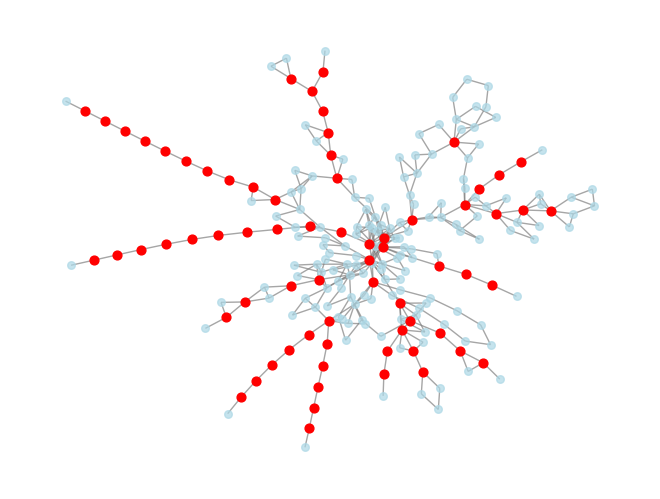

In [86]:
pos = nx.kamada_kawai_layout(undirected_G)
nx.draw(
    undirected_G,
    pos,
    with_labels=False,
    node_color="lightblue",
    node_size=30,
    edge_color="gray",
    alpha=0.7
)
nx.draw_networkx_nodes(
    undirected_G,
    pos,
    nodelist=size_1_cutnodes,
    node_color="red",
    node_size=40
)

Cut Edges (Bridges): [('Dhaka', 'Narayanganj'), ('Parbatipur', 'Saidpur'), ('Ishwardi Bypass', 'Majhgram'), ('Noapara', 'Jashore'), ('Jashore', 'Mubarakganj'), ('Jashore', 'Jhikargacha'), ('Mubarakganj', 'Kotchandpur'), ('Saidpur', 'Nilphamari'), ('Nilphamari', 'Domar'), ('Domar', 'Chilahati'), ('Gobra', 'Borashi'), ('Borashi', 'Gopalganj'), ('Gopalganj', 'Chandradighalia'), ('Chandradighalia', 'Choto Bahirbag'), ('Choto Bahirbag', 'Chapta'), ('Chapta', 'Kashiani'), ('Kashiani', 'Boalmari_Bazar'), ('Boalmari_Bazar', 'Madhukhali'), ('Madhukhali', 'Baharpur'), ('Benapole', 'Jhikargacha'), ('Dhalarchar', 'Badherhat'), ('Badherhat', 'Kashinathpur'), ('Kashinathpur', 'Sathia_Rajapur'), ('Sathia_Rajapur', 'Tantibandha'), ('Tantibandha', 'Dublia'), ('Dublia', 'Raghabpur'), ('Raghabpur', 'Pabna'), ('Pabna', 'Tebunia'), ('Tebunia', 'Dashuria'), ('Dashuria', 'Majhgram'), ('Lolitnagar', 'Amnura'), ('Laksam', 'Natherpetua'), ('Laksam', 'Chitoshi_Road'), ('Jamalpur_Town', 'Melandah_Bazar'), ('Melan

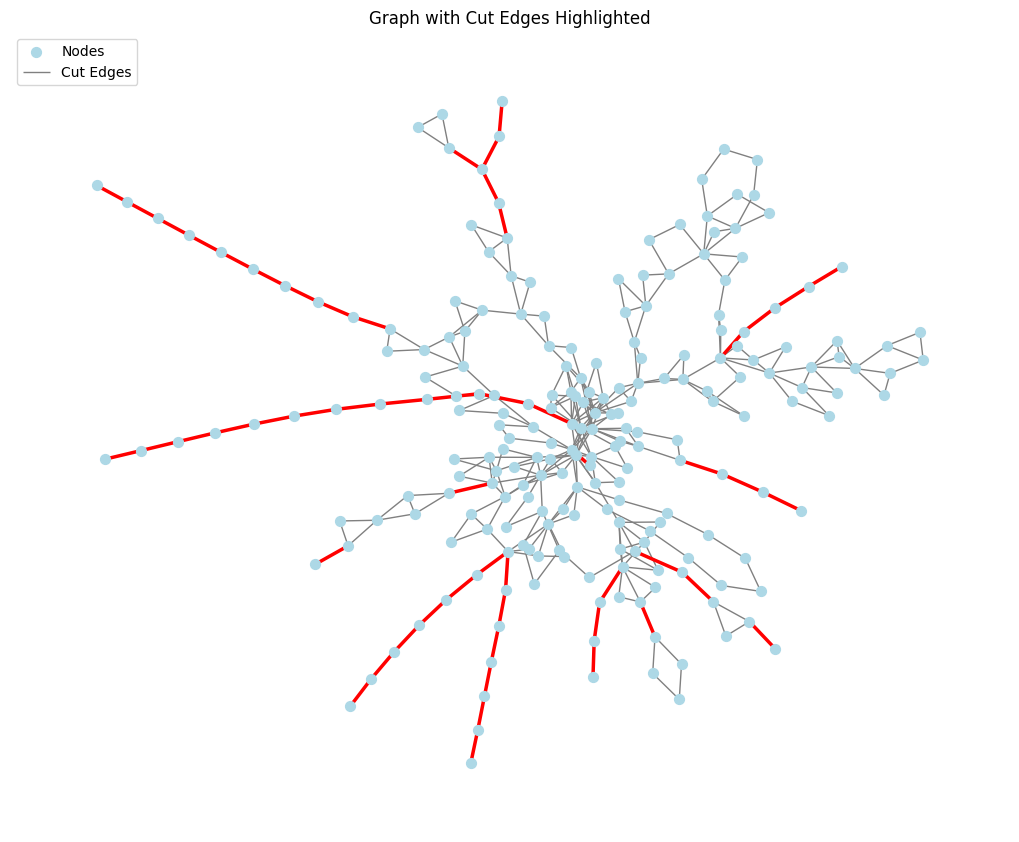

In [92]:
import networkx as nx
import matplotlib.pyplot as plt

def find_cut_edges(G):
    """
    Finds all cut edges (bridges) in the graph.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        list: List of tuples representing the cut edges.
    """
    return list(nx.bridges(G))

def plot_graph_with_cut_edges(G, cut_edges):
    """
    Plots the graph, highlighting the cut edges in red.

    Parameters:
        G (networkx.Graph): The input graph.
        cut_edges (list): List of cut edges.
    """
    pos = nx.kamada_kawai_layout(G)  # Generate layout positions for nodes

    # Draw the graph with default edge colors
    plt.figure(figsize=(10, 8))
    nx.draw(
        G,
        pos,
        with_labels=False,
        node_size=50,
        edge_color="gray",
        node_color="lightblue"
    )

    # Highlight cut edges in red
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=cut_edges,
        edge_color="red",
        width=2.5,
        label="Cut Edges"
    )

    plt.title("Graph with Cut Edges Highlighted")
    plt.legend(["Nodes", "Cut Edges"], loc="upper left")
    plt.show()

# Main script
if __name__ == "__main__":
    # Create an example graph
    G = undirected_G

    # Ensure the graph is connected
    if nx.is_connected(G):
        # Find the cut edges
        cut_edges = find_cut_edges(G)
        print(f"Cut Edges (Bridges): {cut_edges}")

        # Plot the graph with cut edges highlighted
        plot_graph_with_cut_edges(G, cut_edges)
    else:
        print("The graph is not connected. No cut edges exist.")


In [94]:
import networkx as nx
import numpy as np

def calculate_degree_correlation(G):
    """
    Calculate the degree correlation coefficients for the network.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        dict: Contains Pearson degree correlation coefficient and correlation exponent.
    """
    # Calculate Pearson degree correlation coefficient
    pearson_coefficient = nx.degree_pearson_correlation_coefficient(G)
    return {
        "pearson_coefficient": pearson_coefficient,
    }

# Example usage
if __name__ == "__main__":
    # Create an example graph
    G = undirected_G

    # Calculate degree correlation coefficients
    results = calculate_degree_correlation(G)

    # Print results
    print(f"Pearson Degree Correlation Coefficient: {results['pearson_coefficient']}")


Pearson Degree Correlation Coefficient: 0.3263226343971307


In [101]:
knn

{12: 0, 10: 0, 6: 0, 13: 0, 7: 0, 2: 0, 4: 0, 3: 0, 5: 0, 8: 0, 1: 0, 11: 0}

Node degrees: {'Dhaka': 12, 'Biman_Bandar': 12, 'BBSetu_E': 10, 'Chatmohar': 6, 'Natore': 13, 'Santahar': 7, 'Talora': 2, 'Bogura': 4, 'Sonatola': 3, 'Bonar_Para': 5, 'Gaibandha': 4, 'Bamondanga': 2, 'Pirgacha': 2, 'Kaunia': 7, 'Kurigram': 2, 'Rangpur': 3, 'Joypurhat': 6, 'Parbatipur': 8, 'Dinajpur': 6, 'Pirganj': 6, 'Thakurgaon_Road': 6, 'B Sirajul Islam': 3, 'Joydebpur': 8, 'Tangail': 3, 'SH M Monsur Ali': 4, 'Ullapara': 6, 'Ishwardi Bypass': 8, 'Akkelpur': 3, 'Panchbibi': 3, 'Birampur': 4, 'Fulbari': 2, 'Chirirbandar': 4, 'Setabganj': 4, 'Ruhia': 3, 'Kismat': 3, 'Khulna': 2, 'Noapara': 3, 'Jashore': 3, 'Mubarakganj': 2, 'Kotchandpur': 4, 'Darshana_Halt': 3, 'Chuadanga': 4, 'Alamdanga': 2, 'Poradaha': 5, 'Bheramara': 4, 'Pakshi': 2, 'Ishwardi': 6, 'Ahsanganj': 3, 'Saidpur': 2, 'Nilphamari': 2, 'Domar': 2, 'Chilahati': 1, 'Jamtail': 4, 'Boral_Bridge': 4, 'Abdulpur': 7, 'Arani': 4, 'Rajshahi': 11, 'Daulatpur': 2, 'Gobra': 1, 'Borashi': 2, 'Gopalganj': 2, 'Chandradighalia': 2, 'Choto Ba

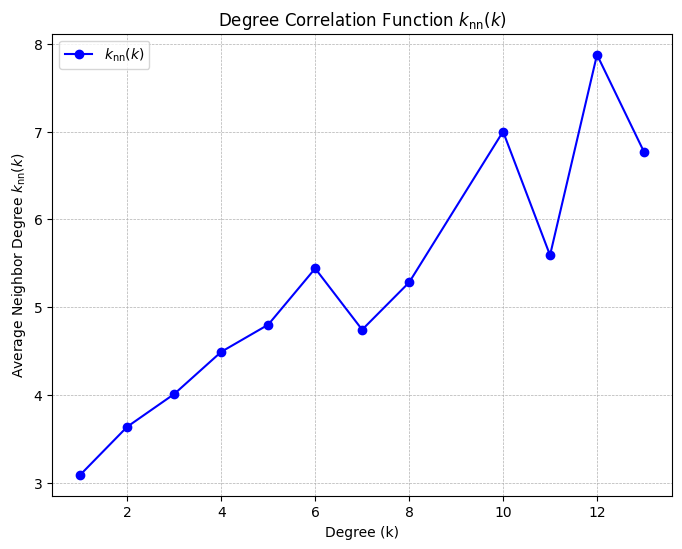

In [125]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

def calculate_knn_with_debug(G):
    """
    Calculate k_nn(k), the average degree of neighbors of nodes with degree k, with debugging output.

    Parameters:
        G (networkx.Graph): The input graph.

    Returns:
        knn (dict): A dictionary where keys are degrees (k) and values are k_nn(k).
    """
    # Get the degree of each node
    degrees = dict(G.degree())
    
    # Debugging: Print node degrees
    print("Node degrees:", degrees)
    
    # Dictionaries to store sums and counts
    degree_sum = defaultdict(int)  # Sum of neighbor degrees for nodes of degree k
    degree_count = defaultdict(int)  # Number of nodes with degree k
    
    # Iterate over all nodes
    for node in G.nodes():
        node_degree = degrees[node]  # Degree of the current node
        neighbors = list(G.neighbors(node))
        neighbor_degrees = [degrees[neighbor] for neighbor in neighbors]
        
        # Debugging: Print node and its neighbors' degrees
        print(f"Node {node} (degree {node_degree}) -> Neighbor degrees: {neighbor_degrees}")
        
        # Update sums and counts for the current node degree
        degree_sum[node_degree] += sum(neighbor_degrees)
        degree_count[node_degree] += len(neighbors)
    
    # Calculate k_nn(k)
    knn = {}
    for k in degree_sum:
        if degree_count[k] > 0:
            knn[k] = degree_sum[k] / degree_count[k]
        else:
            knn[k] = 0
    
    # Debugging: Print intermediate results
    print("Degree sum:", dict(degree_sum))
    print("Degree count:", dict(degree_count))
    print("k_nn(k):", knn)
    
    return knn

def plot_knn(knn):
    """
    Plot k_nn(k) vs. k.

    Parameters:
        knn (dict): A dictionary where keys are degrees (k) and values are k_nn(k).
    """
    # Extract k and k_nn(k)
    k_values = sorted(knn.keys())
    knn_values = [knn[k] for k in k_values]

    # Plot the function
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, knn_values, marker="o", linestyle="-", color="blue", label=r"$k_{\text{nn}}(k)$")
    # plt.xscale("log")
    # plt.yscale("log")
    plt.xlabel("Degree (k)")
    plt.ylabel(r"Average Neighbor Degree $k_{\text{nn}}(k)$")
    plt.title(r"Degree Correlation Function $k_{\text{nn}}(k)$")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create an example undirected graph
    G = undirected_G  # Scale-free network

    # Calculate k_nn(k)
    knn = calculate_knn_with_debug(G)

    # Plot the results
    plot_knn(knn)


In [117]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def degree_preserving_randomization(G, num_swaps):
    """
    Perform degree-preserving randomization of an undirected graph, ensuring it remains simple
    and no edge is used more than once during a single swap.

    Parameters:
        G (networkx.Graph): The input graph.
        num_swaps (int): The number of edge swaps to perform.

    Returns:
        G_randomized (networkx.Graph): A new graph with randomized edges.
    """
    # Make a copy of the input graph to avoid modifying the original
    G_randomized = G.copy()
    swaps = 0
    attempts = 0
    max_attempts = num_swaps * 10  # To avoid infinite loops if swaps are not feasible

    while swaps < num_swaps and attempts < max_attempts:
        attempts += 1

        # Dynamically retrieve the edge list to ensure consistency
        edges = list(G_randomized.edges())
        
        # Randomly select two distinct edges (a, b) and (c, d)
        edge1, edge2 = random.sample(edges, 2)
        a, b = edge1
        c, d = edge2

        # Skip if the swap creates self-loops or duplicate edges
        if len({a, b, c, d}) < 4:  # Self-loop check
            continue
        if (a, d) in edges or (c, b) in edges:  # Duplicate edge check
            continue

        # Perform the edge swap
        G_randomized.remove_edge(a, b)
        G_randomized.remove_edge(c, d)
        G_randomized.add_edge(a, d)
        G_randomized.add_edge(c, b)

        swaps += 1

    if attempts >= max_attempts:
        print(f"Stopped after {attempts} attempts with {swaps} successful swaps.")
    else:
        print(f"Completed {swaps} swaps successfully.")

    return G_randomized

In [123]:
randomized_undir_G = degree_preserving_randomization(undirected_G, 10000)

Completed 10000 swaps successfully.


Node degrees: {'Dhaka': 12, 'Biman_Bandar': 12, 'BBSetu_E': 10, 'Chatmohar': 6, 'Natore': 13, 'Santahar': 7, 'Talora': 2, 'Bogura': 4, 'Sonatola': 3, 'Bonar_Para': 5, 'Gaibandha': 4, 'Bamondanga': 2, 'Pirgacha': 2, 'Kaunia': 7, 'Kurigram': 2, 'Rangpur': 3, 'Joypurhat': 6, 'Parbatipur': 8, 'Dinajpur': 6, 'Pirganj': 6, 'Thakurgaon_Road': 6, 'B Sirajul Islam': 3, 'Joydebpur': 7, 'Tangail': 3, 'SH M Monsur Ali': 4, 'Ullapara': 6, 'Ishwardi Bypass': 7, 'Akkelpur': 3, 'Panchbibi': 3, 'Birampur': 4, 'Fulbari': 2, 'Chirirbandar': 4, 'Setabganj': 4, 'Ruhia': 3, 'Kismat': 3, 'Khulna': 2, 'Noapara': 3, 'Jashore': 3, 'Mubarakganj': 2, 'Kotchandpur': 4, 'Darshana_Halt': 3, 'Chuadanga': 4, 'Alamdanga': 2, 'Poradaha': 5, 'Bheramara': 4, 'Pakshi': 2, 'Ishwardi': 6, 'Ahsanganj': 3, 'Saidpur': 2, 'Nilphamari': 2, 'Domar': 2, 'Chilahati': 1, 'Jamtail': 4, 'Boral_Bridge': 4, 'Abdulpur': 6, 'Arani': 4, 'Rajshahi': 11, 'Daulatpur': 2, 'Gobra': 1, 'Borashi': 2, 'Gopalganj': 2, 'Chandradighalia': 2, 'Choto Ba

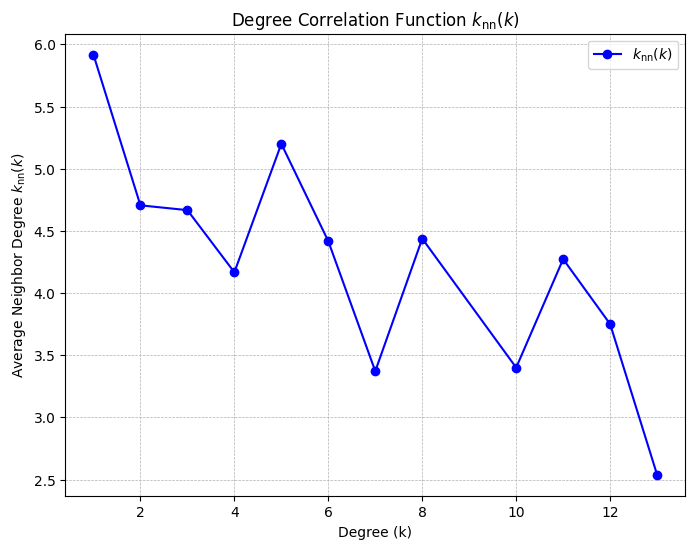

In [126]:
knn_randomized = calculate_knn_with_debug(randomized_undir_G)
plot_knn(knn_randomized)

In [127]:
# pearson correlation coefficient for the randomized graph
results_randomized = calculate_degree_correlation(randomized_undir_G)
print(f"Pearson Degree Correlation Coefficient (Randomized): {results_randomized['pearson_coefficient']}")

Pearson Degree Correlation Coefficient (Randomized): -0.12282735650755533
